In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
cdtx_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_train.csv')
dp_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_train.csv')
remit_train = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_train.csv')
cdtx_test = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_test_private.csv')
dp_test = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_test_private.csv')
remit_test = pd.read_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_test_private.csv')

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

In [35]:
cdtx_X = cdtx_train.iloc[:,1:-1].values
cdtx_y = cdtx_train.iloc[:,-1].values

In [36]:
dp_X = dp_train.iloc[:,1:-1].values
dp_y = dp_train.iloc[:,-1].values

In [37]:
remit_X = remit_train.iloc[:,1:-1].values
remit_y = remit_train.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cdtx_X, cdtx_y, test_size = 0.1)

In [39]:
cdtx_ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),[0,1,3,5,6])], remainder='passthrough')
X_train_new = cdtx_ct.fit_transform(X_train)


In [40]:
X_train.shape

(43296, 9)

In [41]:
X_test_new = cdtx_ct.transform(X_test)

In [42]:
X_test.shape

(4811, 9)

In [43]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train_new, y_train)

SVC(random_state=0)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test_new)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4764    0]
 [  47    0]]


In [45]:
print('Test set Accuracy: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

Test set Accuracy: 99.02 %


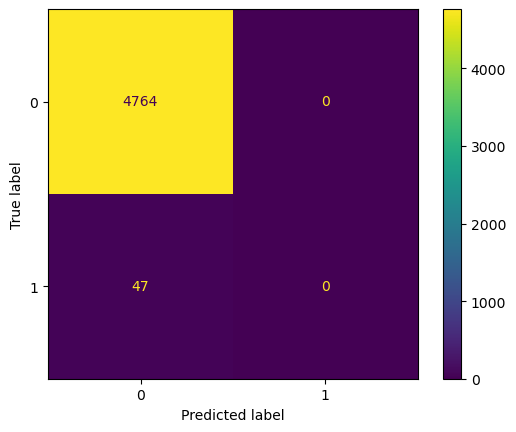

In [46]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()